<a href="https://colab.research.google.com/github/Sriharan-Thirumurthi/Trafficdataset-/blob/main/Trafficdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Banglore_traffic_Dataset.csv")

In [ ]:
import seaborn as sn
import plotly.express as px
df.head().isnull().sum()

,0
Date,0
Area Name,0
Road/Intersection Name,0
Traffic Volume,0
Average Speed,0
Travel Time Index,0
Congestion Level,0
Road Capacity Utilization,0
Incident Reports,0
Environmental Impact,0


In [ ]:
heatmap_data=df.pivot_table(values='Traffic Volume', columns='Road/Intersection Name', index='Area Name', aggfunc='sum')
fig = px.imshow(heatmap_data, labels=dict(x="Road/Intersection Name", y="Area Name", color="Traffic Volume"),
                title="Heatmap of Traffic Volume Across Areas and Roads")
fig.show()

In [ ]:
fig = px.scatter(df, x='Traffic Volume', y='Average Speed', color='Congestion Level',
                 size='Traffic Volume', hover_data=['Area Name', 'Road/Intersection Name'],
                 title="Scatter Plot of Traffic Volume vs. Average Speed with Congestion Level",color_continuous_scale='Magenta')
fig.show()



In [ ]:
piedata = df.groupby('Area Name')['Incident Reports'].sum().reset_index()
fig = px.pie(piedata, values='Incident Reports', names='Area Name',
             title="Pie Chart of Incident Reports by Area")
fig.show()

In [ ]:
fig = px.histogram(df, x='Weather Conditions', y='Traffic Volume', color='Area Name',
                   barmode='stack', title="Stacked Bar Chart of Traffic Volume by Weather Conditions")
fig.show()

In [ ]:
# Now, let's create a new column 'New Date' and 'New Traffic Volume'.
# We will sum the 'Traffic Volume' for each unique 'Date'.

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Date' and sum the 'Traffic Volume'
df_new = df.groupby('Date')['Traffic Volume'].sum().reset_index()

# Rename the columns
df_new.columns = ['New date', 'New traffic volume']

# Show the result
df_new.head()


,New date,New traffic volume
0,2022-01-01,427052
1,2022-01-02,306997
2,2022-01-03,186623
3,2022-01-04,325288
4,2022-01-05,327385


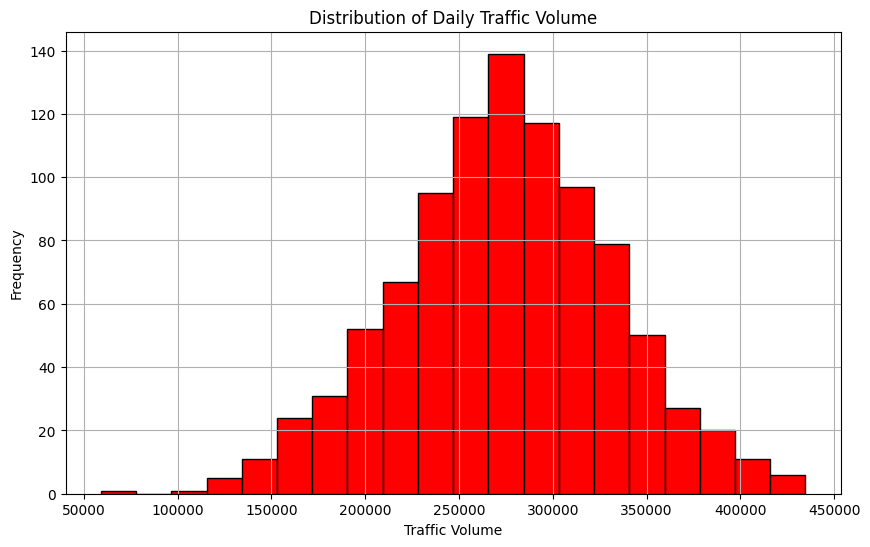

In [ ]:
# @title Distribution of Daily Traffic Volume

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_new['New traffic volume'], bins=20, edgecolor='black',color='red')
plt.grid(True)
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Daily Traffic Volume')

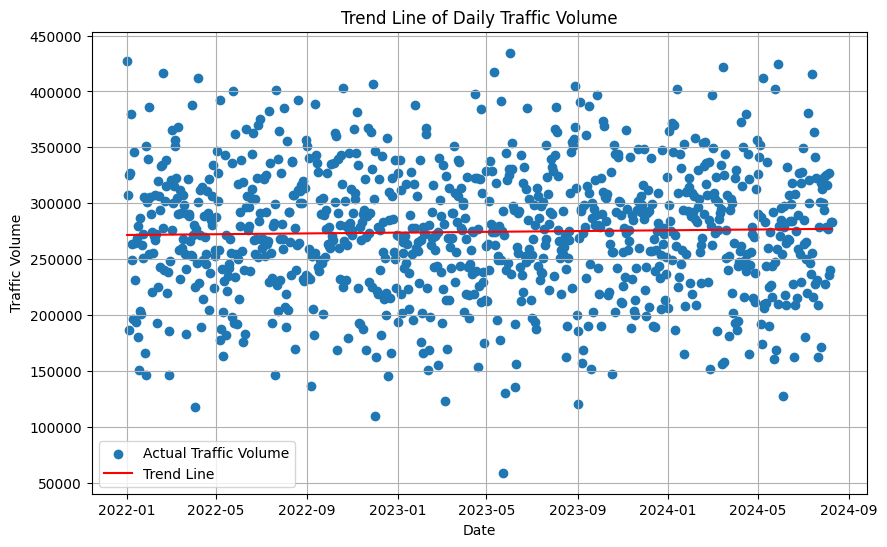

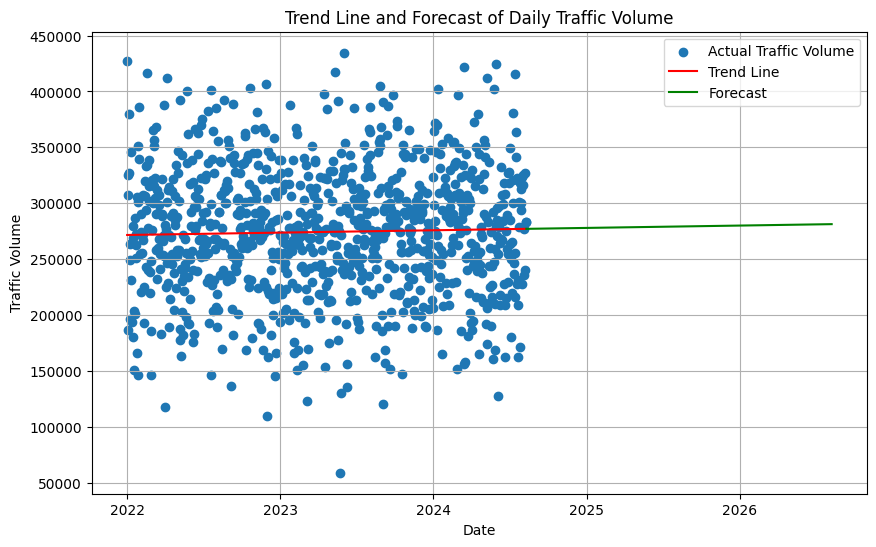

In [ ]:
# prompt: create a trend line for df_new using New date and New traffic volume and forecast for upcoming years
# Convert 'New date' to numerical representation (e.g., days since the first date)
df_new['Days'] = (df_new['New date'] - df_new['New date'].min()).dt.days

# Prepare the data for the linear regression model
X = df_new[['Days']]
y = df_new['New traffic volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the trend line
plt.figure(figsize=(10, 6))
plt.scatter(df_new['New date'], df_new['New traffic volume'], label='Actual Traffic Volume')
plt.plot(df_new['New date'], model.predict(df_new[['Days']]), color='red', label='Trend Line')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Trend Line of Daily Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

# Forecast for upcoming years
future_dates = [df_new['New date'].max() + datetime.timedelta(days=i) for i in range(1, 365 * 2)]  # Forecast for the next 2 years
future_days = [(date - df_new['New date'].min()).days for date in future_dates]
future_X = pd.DataFrame({'Days': future_days})

future_y_pred = model.predict(future_X)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.scatter(df_new['New date'], df_new['New traffic volume'], label='Actual Traffic Volume')
plt.plot(df_new['New date'], model.predict(df_new[['Days']]), color='red', label='Trend Line')
plt.plot(future_dates, future_y_pred, color='green', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Trend Line and Forecast of Daily Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_new = df.groupby('Date')['Environmental Impact'].mean().reset_index()
df_new.columns = ['New date', 'New Environmental Impact']
df_new.head()


,New date,New Environmental Impact
0,2022-01-01,121.175333
1,2022-01-02,105.817636
2,2022-01-03,103.320857
3,2022-01-04,109.143273
4,2022-01-05,115.477000


In [ ]:
# prompt: change new date to month like jan 2022,feb 2022

# Convert 'New date' to the desired format (e.g., Jan 2022, Feb 2022)
df_new['New date'] = df_new['New date'].dt.strftime('%b %Y')

# Show the updated DataFrame
df_new.head()


,New date,New Environmental Impact
0,Jan 2022,121.175333
1,Jan 2022,105.817636
2,Jan 2022,103.320857
3,Jan 2022,109.143273
4,Jan 2022,115.477000


In [ ]:
df_new.tail()

,New date,New Environmental Impact
947,Aug 2024,102.415556
948,Aug 2024,109.404727
949,Aug 2024,93.644000
950,Aug 2024,106.641600
951,Aug 2024,112.933333


In [ ]:
df_verynew=df_new.copy()
file_name=('Environmental Impact.xlsx')
df_verynew.to_excel(file_name)

In [ ]:
# prompt: in df_new, give the average environmental impact of each month

import pandas as pd
# Convert 'New date' to datetime objects
df_new['New date'] = pd.to_datetime(df_new['New date'])

# Extract the year and month from the 'New date' column
df_new['Year'] = df_new['New date'].dt.year
df_new['Month'] = df_new['New date'].dt.month

# Group by year and month, calculate the average environmental impact
monthly_avg_impact = df_new.groupby(['Year', 'Month'])['New Environmental Impact'].mean().reset_index()

# Display the result
print(monthly_avg_impact)


    Year  Month  New Environmental Impact
0   2022      1                107.943499
1   2022      2                106.649731
2   2022      3                110.045083
3   2022      4                108.529322
4   2022      5                107.817910
5   2022      6                111.272565
6   2022      7                108.023360
7   2022      8                109.814552
8   2022      9                109.019452
9   2022     10                110.194991
10  2022     11                109.124496
11  2022     12                109.546625
12  2023      1                107.439351
13  2023      2                107.024538
14  2023      3                108.771790
15  2023      4                109.569254
16  2023      5                107.382729
17  2023      6                111.118827
18  2023      7                107.702595
19  2023      8                108.815988
20  2023      9                107.558188
21  2023     10                107.619739
22  2023     11                108

<ipython-input-57-fccf1c1d6fe5>:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
# prompt: roadcapacity utilisation and congestion level charts

import plotly.express as px

# Group by 'Road/Intersection Name' and calculate the average 'Traffic Volume'
road_capacity_data = df.groupby('Road/Intersection Name')['Traffic Volume'].mean().reset_index()

# Rename the columns for clarity
road_capacity_data.columns = ['Road/Intersection Name', 'Average Traffic Volume']

# Create a bar chart for road capacity utilization
fig = px.bar(road_capacity_data, x='Road/Intersection Name', y='Average Traffic Volume',
             title='Road Capacity Utilization')
fig.show()

# Create a bar chart for congestion level
fig = px.bar(df, x='Road/Intersection Name', y='Congestion Level',
             title='Congestion Level by Road')
fig.show()

# You can further customize these charts by adding colors, labels, and other elements as per your needs.

# For example, you can color the bars based on the 'Congestion Level'
# fig = px.bar(df, x='Road/Intersection Name', y='Traffic Volume', color='Congestion Level',
#              title='Road Capacity Utilization and Congestion Level')
# fig.show()


<ipython-input-73-051bdd7fcbe6>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




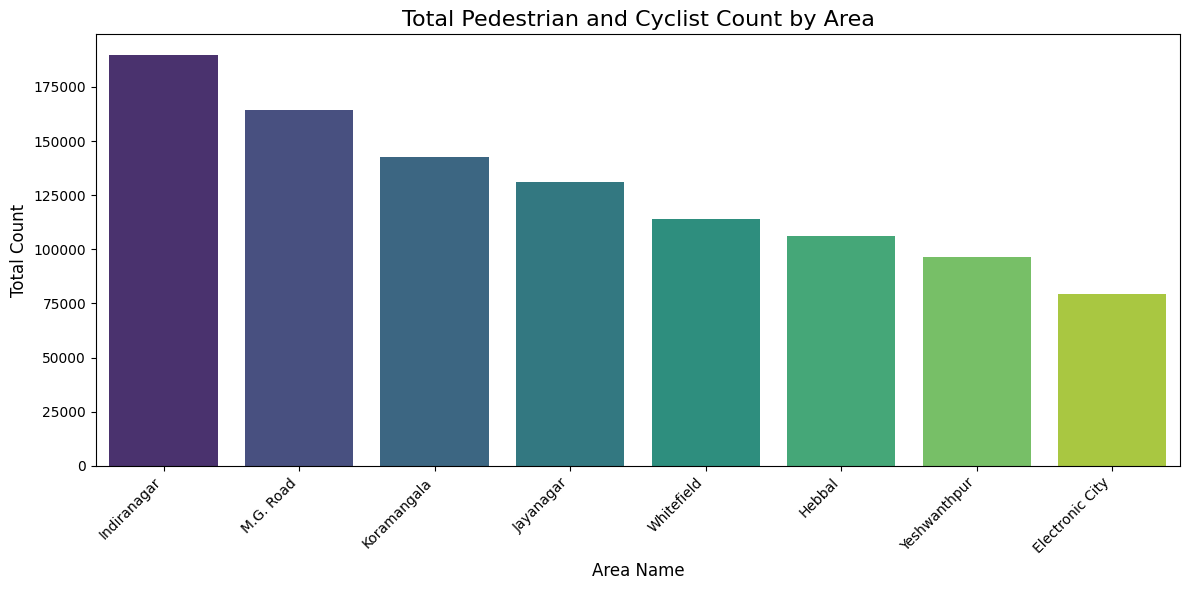

In [ ]:
import seaborn as sns

df_grouped = df.groupby('Area Name')['Pedestrian and Cyclist Count'].sum().reset_index()

# Sort the values for better visualization
df_grouped = df_grouped.sort_values('Pedestrian and Cyclist Count', ascending=False)

# Plotting a bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='Area Name', y='Pedestrian and Cyclist Count', palette='viridis')

# Add titles and labels
plt.title('Total Pedestrian and Cyclist Count by Area', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Count', fontsize=12)
plt.xlabel('Area Name', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


AttributeError: module 'plotly.express' has no attribute 'show'

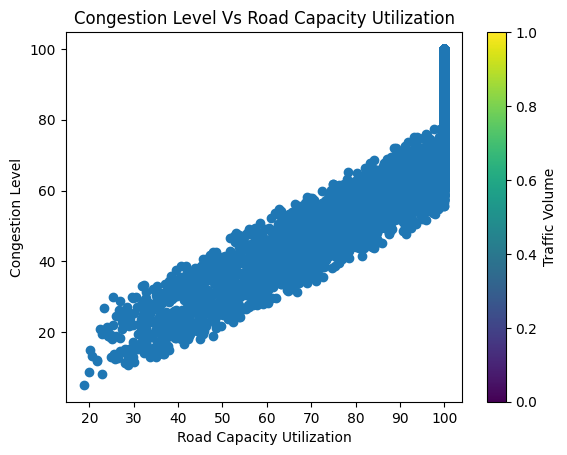

In [ ]:
fig=plt.scatter(x=df['Road Capacity Utilization'],y=df['Congestion Level'])
plt.title('Congestion Level Vs Road Capacity Utilization')
plt.xlabel('Road Capacity Utilization')
plt.ylabel('Congestion Level')
plt.colorbar(label='Traffic Volume')


In [ ]:
fig = px.scatter(df, x='Congestion Level', y='Road Capacity Utilization', color='Traffic Volume',
                 size='Traffic Volume',
                 title="Congestion Level Vs Road Capacity Utilization")
fig.show()